In [2]:
from marley.utils.ipstartup import *
from marley import *
from marley.tif import getdf
from marley.pandas import *
import rasterio
import plotly.express as px
import geopandas as gpd
from geopy.distance import EARTH_RADIUS, geodesic
from sklearn.cluster import DBSCAN
os.chdir(c.localpath)
popfile = "grid3/GRID3_NGA_PopEst_v1_1_mean_float.tif"
lightsfile = "grid3/lights.tif"
f = rasterio.open(popfile)

[cellevents:INFO]:starting (cellevents.py:43, time=Dec-14 18:47)


time: 16.1 ms


# archive and todo

In [ ]:
# latlon model. takes 10+ times longer
eps = 1.5 / EARTH_RADIUS
x = unlit[["lat", "lon"]].values
m = DBSCAN(eps=eps, min_samples=4000, algorithm='ball_tree', metric='haversine', n_jobs=-1)
label = m.fit_predict(np.radians(x), sample_weight=weights)
df.label.update(pd.Series(label, index=unlit.index))
df.label = df.label.astype(int)

In [8]:
# colors for different clusters (now use bounds instead)
dfc["color"] = np.random.randint(1,12,len(dfc))
# setting unlit first is faster
unlit["color"] = unlit.label.map(dfc.color)
df["label"] = unlit["label"]
df["color"] = unlit["color"]
out = df["color"].values.reshape(f.shape).astype(np.int32)
profile=rasterio.open(popfile).profile
profile["dtype"] = "int32"
del profile["nodata"]
with rasterio.open("popcolors.tif", "w", **profile) as f:
    f.write(out,1)

[cellevents:INFO]:starting (cellevents.py:43, time=Dec-12 17:29)


time: 31.3 s


In [257]:
%%s
# 4 colors clear sepration but slow and memory issues
get_color(unlit, inplace=True)

[cellevents:INFO]:starting (cellevents.py:43, time=Dec-12 12:25)


KeyError: MemoryError()

time: 4min 16s


In [205]:
from shapely.geometry import Point, Polygon, MultiPoint
c = unlit[unlit.label==0]

[cellevents:INFO]:starting (cellevents.py:43, time=Dec-12 19:51)


time: 28 ms


In [224]:
unlit = unlit[unlit.label>=0]

[cellevents:INFO]:starting (cellevents.py:43, time=Dec-12 19:57)


time: 57 ms


In [240]:
dfc.apply()

[cellevents:INFO]:starting (cellevents.py:43, time=Dec-12 20:09)


,label,population,area,row,col,lat,lon,density,address,address0,address1,address2,geolocator,color
0,0,4741,0.978923,37.301075,3465.698925,13.860583,5.557249,5936,"Rafinduma, Sokoto, Nigeria",Rafinduma,Sokoto,Nigeria,Photon,1
1,1,4275,0.905933,52.445783,3498.024096,13.847962,5.584187,5998,"Gidan Tanko, Sokoto, Nigeria",Gidan Tanko,Sokoto,Nigeria,Photon,3
2,2,10828,12.159254,115.834951,3649.121359,13.795138,5.710101,6121,"Bigal, Sokoto, Nigeria",Bigal,Sokoto,Nigeria,Photon,8
3,3,8669,4.886028,117.244444,3216.927778,13.793963,5.349940,5608,"Mallamawa1, Sokoto, Nigeria",Mallamawa1,Sokoto,Nigeria,Photon,4
4,4,12034,6.131149,139.211340,3384.170103,13.775657,5.489308,7223,"Wauru, Sokoto, Nigeria",Wauru,Sokoto,Nigeria,Photon,1
5,5,5638,1.356753,140.000000,3289.973684,13.775000,5.410811,5759,"Hasamawa, Sokoto, Nigeria",Hasamawa,Sokoto,Nigeria,Photon,2
6,6,5049,3.868463,142.358491,3438.339623,13.773035,5.534450,5546,NaN,NaN,NaN,NaN,NaN,2
7,7,13663,8.127637,150.551471,3516.161765,13.766207,5.599301,5849,NaN,NaN,NaN,NaN,NaN,7
8,8,8908,9.694772,172.933735,3661.590361,13.747555,5.720492,6249,NaN,NaN,NaN,NaN,NaN,3
9,9,11247,16.328263,165.564784,3586.209302,13.753696,5.657674,4351,NaN,NaN,NaN,NaN,NaN,6


time: 33 ms


In [241]:
dfc.apply(lambda x: gpd.GeoSeries(MultiPoint(list(zip(x.lon, x.lat))).convex_hull), axis=1)

[cellevents:INFO]:starting (cellevents.py:43, time=Dec-12 20:09)


TypeError: ('zip argument #1 must support iteration', 'occurred at index 0')

time: 32 ms


[cellevents:INFO]:starting (cellevents.py:43, time=Dec-12 19:58)


time: 4 ms


In [204]:
gpd.GeoSeries(hull)

[cellevents:INFO]:starting (cellevents.py:43, time=Dec-12 19:50)


0.09266630189865996

time: 3 ms


In [203]:
7.91666660299415e-05*(6371/360)**2

[cellevents:INFO]:starting (cellevents.py:43, time=Dec-12 19:49)


0.02479434068921467

time: 2 ms


In [192]:
0.9789229598633893/7.91666660299415e-05

[cellevents:INFO]:starting (cellevents.py:43, time=Dec-12 19:40)


12365.342750358494

time: 2 ms


In [128]:
px.scatter(x=c0.col, y=-c0.row)

[cellevents:INFO]:starting (cellevents.py:43, time=Dec-12 19:02)


time: 222 ms


In [129]:
px.scatter(x=c0.lon, y=c0.lat)

[cellevents:INFO]:starting (cellevents.py:43, time=Dec-12 19:02)


time: 230 ms


In [112]:
mp.convex_hull.area

[cellevents:INFO]:starting (cellevents.py:43, time=Dec-12 18:56)


114.0

time: 3.82 ms


[cellevents:INFO]:starting (cellevents.py:43, time=Dec-12 18:04)


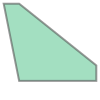

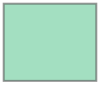

time: 5.96 ms


In [72]:
points = [Point(row, col) for row,col in rawpoints]
mp = MultiPoint(points)
d(mp.convex_hull, mp.envelope)

In [193]:
## add envelopes to dfc
#unlit = unlit[unlit.label>=0]
#geom = unlit.groupby("label").apply(lambda x: gpd.GeoSeries(gpd.points_from_xy(x.lon,x.lat).envelope)).values
gdf = gpd.GeoDataFrame(dfc)
#gdf["geometry"] = geom
gdf

[cellevents:INFO]:starting (cellevents.py:43, time=Dec-12 11:21)


,population,area,row,col,lat,lon,density,address,address0,address1,address2,geolocator,label_out,geometry
label,,,,,,,,,,,,,,
0,4741,0,37.301075,3465.698925,13.860583,5.557249,5936,"Rafinduma, Sokoto, Nigeria",Rafinduma,Sokoto,Nigeria,Photon,0=4741,POINT (5.34333 13.81167)
1,4275,0,52.445783,3498.024096,13.847962,5.584187,5998,"Gidan Tanko, Sokoto, Nigeria",Gidan Tanko,Sokoto,Nigeria,Photon,1=4275,POINT (5.34333 13.81167)
2,10828,1,115.834951,3649.121359,13.795138,5.710101,6121,"Bigal, Sokoto, Nigeria",Bigal,Sokoto,Nigeria,Photon,2=10828,POINT (5.34333 13.81167)
3,8669,1,117.244444,3216.927778,13.793963,5.349940,5608,"Mallamawa1, Sokoto, Nigeria",Mallamawa1,Sokoto,Nigeria,Photon,3=8669,POINT (5.34333 13.81167)
4,12034,1,139.211340,3384.170103,13.775657,5.489308,7223,"Wauru, Sokoto, Nigeria",Wauru,Sokoto,Nigeria,Photon,4=12034,POINT (5.34333 13.81167)
5,5638,0,140.000000,3289.973684,13.775000,5.410811,5759,"Hasamawa, Sokoto, Nigeria",Hasamawa,Sokoto,Nigeria,Photon,5=5638,POINT (5.34333 13.81167)
6,5049,0,142.358491,3438.339623,13.773035,5.534450,5546,NaN,NaN,NaN,NaN,NaN,6=5049,POINT (5.34333 13.81167)
7,13663,2,150.551471,3516.161765,13.766207,5.599301,5849,NaN,NaN,NaN,NaN,NaN,7=13663,POINT (5.34333 13.81167)
8,8908,1,172.933735,3661.590361,13.747555,5.720492,6249,NaN,NaN,NaN,NaN,NaN,8=8908,POINT (5.34333 13.81167)


time: 43.1 ms


In [15]:
# add points
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))

[cellevents:INFO]:starting (cellevents.py:43, time=Dec-07 20:33)


time: 12.9 s


In [38]:
# get outer border. 
gdf[gdf.label==3]

[cellevents:INFO]:starting (cellevents.py:43, time=Dec-07 20:46)


,population,lights,row,col,lon,lat,labels,geometry
6096,45,0.0,4,332,5.441666,13.850000,3,POINT (5.44167 13.85000)
6097,852,0.0,4,333,5.449999,13.850000,3,POINT (5.45000 13.85000)
7538,580,0.0,5,333,5.449999,13.841667,3,POINT (5.45000 13.84167)
7539,799,0.0,5,334,5.458333,13.841667,3,POINT (5.45833 13.84167)
8978,987,0.0,6,332,5.441666,13.833334,3,POINT (5.44167 13.83333)
8979,1059,0.0,6,333,5.449999,13.833334,3,POINT (5.45000 13.83333)
8980,428,0.0,6,334,5.458333,13.833334,3,POINT (5.45833 13.83333)
10419,1202,0.0,7,332,5.441666,13.825000,3,POINT (5.44167 13.82500)
10420,709,0.0,7,333,5.449999,13.825000,3,POINT (5.45000 13.82500)
10421,758,0.0,7,334,5.458333,13.825000,3,POINT (5.45833 13.82500)


time: 16 ms


[cellevents:INFO]:starting (cellevents.py:43, time=Dec-07 21:00)
[shapely.geos:INFO]:Self-intersection at or near point 0.80000000000000004 0.40000000000000002 (geos.py:219, time=Dec-07 21:00)


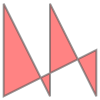

time: 14 ms


In [50]:
#points = [Point(r.row, r.col) for i, r in gdf[gdf.label==3].iterrows()]
points = [Point(row, col) for row,col in [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2), (2,0), (2,1)]]
coords = sum(map(list, (p.coords for p in points)), [])
poly = Polygon(coords)
poly.